In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, itertools
from collections import Counter
%matplotlib inline

# Followers

In [67]:
users = nx.read_edgelist("friendships.csv", delimiter = "\t", create_using = nx.DiGraph)

In [68]:
print("Nodes", users.number_of_nodes())
print("Edges", users.number_of_edges())
print("Density", nx.density(users))

Nodes 27
Edges 403
Density 0.5740740740740741


/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


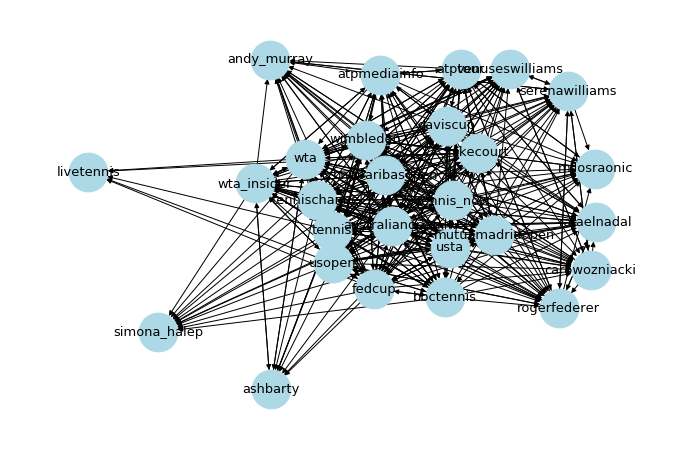

In [69]:
plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( users, k = 2.2 )
nx.draw(users, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")

In [6]:
in_deg = pd.Series(dict( users.in_degree() ), name="in-degree")
pd.DataFrame(in_deg).sort_values(by="in-degree", ascending=False).head(10)

in-degree
wimbledon              20
australianopen         19
usopen                 19
andy_murray            19
rogerfederer           18
serenawilliams         18
atptour                18
wta                    18
carowozniacki          18
rafaelnadal            18

In [7]:
print("Reciprocity %.2f" % nx.reciprocity(users) )

Reciprocity 0.65


In [8]:
pairs = []
for pair in itertools.combinations(users.nodes(), r=2):
    if users.has_edge( pair[0], pair[1] ) and users.has_edge( pair[1], pair[0] ):
        pairs.append(pair)
pairs

[('atpmediainfo', 'atptour'),
 ('atpmediainfo', 'australianopen'),
 ('atpmediainfo', 'bnpparibasopen'),
 ('atpmediainfo', 'daviscup'),
 ('atpmediainfo', 'mutuamadridopen'),
 ('atpmediainfo', 'tennis'),
 ('atpmediainfo', 'tennischannel'),
 ('atpmediainfo', 'usopen'),
 ('atpmediainfo', 'usta'),
 ('atpmediainfo', 'wta_insider'),
 ('andy_murray', 'carowozniacki'),
 ('andy_murray', 'serenawilliams'),
 ('atptour', 'australianopen'),
 ('atptour', 'bnpparibasopen'),
 ('atptour', 'daviscup'),
 ('atptour', 'mutuamadridopen'),
 ('atptour', 'rogerfederer'),
 ('atptour', 'tennis'),
 ('atptour', 'tennis_now'),
 ('atptour', 'tennischannel'),
 ('atptour', 'usopen'),
 ('atptour', 'usta'),
 ('atptour', 'wta'),
 ('atptour', 'milosraonic'),
 ('atptour', 'rafaelnadal'),
 ('australianopen', 'bbctennis'),
 ('australianopen', 'bnpparibasopen'),
 ('australianopen', 'daviscup'),
 ('australianopen', 'fedcup'),
 ('australianopen', 'rogerfederer'),
 ('australianopen', 'tennis'),
 ('australianopen', 'tennis_now'),


In [9]:
ug1 = users.to_undirected( reciprocal=True )
ug1.number_of_nodes(), ug1.number_of_edges()

(27, 131)

/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


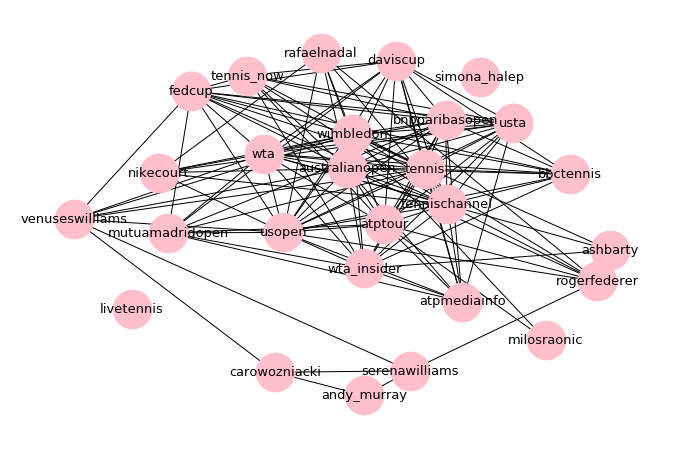

In [10]:
plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( ug1, k = 2.2 )
nx.draw(ug1, pos, with_labels = True, node_size=1500, font_size=13, node_color="pink")

# Reply

In [11]:
fin = open( "tweets.jsonl", "r" )
tweets = []
# process the file line-by-line
for line in fin.readlines():
    line = line.strip()
    # each line contains a JSON document, representing a single tweet
    tweet = json.loads(line)
    tweets.append(tweet)
fin.close()
print("Read %d tweets" % len(tweets))

Read 13468 tweets


In [12]:
df = pd.DataFrame(tweets)

In [13]:
users = []
for l in tweets:
        data = l['user']
        users.append(data) 
print("Read %d user" % len(users))
users

Read 13468 user


[{'id': 14836219,
  'id_str': '14836219',
  'name': 'USTA',
  'screen_name': 'usta',
  'location': 'White Plains, NY',
  'description': 'To Promote and Develop the Growth of Tennis. Join the movement: #NetGeneration Terms of Use: https://t.co/1IdS8NGr0D',
  'url': 'https://t.co/i091CbLY8h',
  'entities': {'url': {'urls': [{'url': 'https://t.co/i091CbLY8h',
      'expanded_url': 'http://usta.com',
      'display_url': 'usta.com',
      'indices': [0, 23]}]},
   'description': {'urls': [{'url': 'https://t.co/1IdS8NGr0D',
      'expanded_url': 'http://bit.ly/1o7hQjy',
      'display_url': 'bit.ly/1o7hQjy',
      'indices': [93, 116]}]}},
  'protected': False,
  'followers_count': 439968,
  'friends_count': 2028,
  'listed_count': 1673,
  'created_at': 'Mon May 19 18:37:42 +0000 2008',
  'favourites_count': 20134,
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'verified': True,
  'statuses_count': 27481,
  'lang': None,
  'contributors_enabled': False,
  'is_translator

In [14]:
df_user = pd.DataFrame(users)
df_user

contributors_enabled                      created_at  default_profile  \
0                     False  Mon May 19 18:37:42 +0000 2008            False   
1                     False  Wed Mar 24 23:46:03 +0000 2010            False   
2                     False  Fri Jul 31 09:52:14 +0000 2015            False   
3                     False  Wed Oct 21 14:50:57 +0000 2009            False   
4                     False  Mon Jan 04 14:10:03 +0000 2016             True   
5                     False  Thu Jun 25 18:30:53 +0000 2009            False   
6                     False  Thu Jun 25 18:30:53 +0000 2009            False   
7                     False  Tue Feb 03 16:15:56 +0000 2009            False   
8                     False  Thu Oct 15 09:37:36 +0000 2009            False   
9                     False  Wed May 21 14:49:35 +0000 2008            False   
10                    False  Mon May 19 18:37:42 +0000 2008            False   
11                    False  Thu Oct 14 07:38:42 +0000 2010            False   
12                    False  Fri Jul 29 10:44:02 +0000 2011            False   
13                    False  Fri Jul 31 09:52:14 +0000 2015            False   
14                    False  Mon May 19 18:35:03 +0000 2008            False   
15                    False  Mon Apr 28 16:54:57 +0000 2008            False   
16                    False  Sat Jan 10 21:40:42 +0000 2009            False   
17                    False  Sat Jan 10 21:40:42 +0000 2009            False   
18                    False  Sun Apr 26 10:20:54 +0000 2009            False   
19                    False  Wed Mar 24 23:46:03 +0000 2010            False   
20                    False  Wed Mar 24 23:46:03 +0000 2010            False   
21                    False  Thu Jun 25 18:30:53 +0000 2009            False   
22                    False  Thu Feb 19 12:18:10 +0000 2009            False   
23                    False  Thu Apr 09 16:40:36 +0000 2009            False   
24                    False  Mon May 19 18:37:42 +0000 2008            False   
25                    False  Wed Mar 25 21:00:33 +0000 2009            False   
26                    False  Thu Apr 09 16:40:36 +0000 2009            False   
27                    False  Tue Nov 04 15:21:46 +0000 2008            False   
28                    False  Mon May 19 18:37:42 +0000 2008            False   
29                    False  Thu Feb 19 12:18:10 +0000 2009            False   
...                     ...                             ...              ...   
13438                 False  Tue Feb 03 16:15:56 +0000 2009            False   
13439                 False  Sat Aug 29 20:34:11 +0000 2009            False   
13440                 False  Tue Mar 11 14:22:56 +0000 2008            False   
13441                 False  Wed Oct 21 14:50:57 +0000 2009            False   
13442                 False  Thu Jul 03 19:42:59 +0000 2014            False   
13443                 False  Thu Apr 09 16:40:36 +0000 2009            False   
13444                 False  Mon Apr 08 22:33:48 +0000 2013            False   
13445                 False  Mon May 19 18:35:03 +0000 2008            False   
13446                 False  Wed Dec 02 20:15:06 +0000 2009            False   
13447                 False  Fri Oct 16 08:30:55 +0000 2009            False   
13448                 False  Mon May 19 18:37:42 +0000 2008            False   
13449                 False  Wed Mar 25 21:00:33 +0000 2009            False   
13450                 False  Mon Apr 28 16:54:57 +0000 2008            False   
13451                 False  Tue Feb 03 16:15:56 +0000 2009            False   
13452                 False  Sat Aug 29 20:34:11 +0000 2009            False   
13453                 False  Sun Apr 26 10:20:54 +0000 2009            False   
13454                 False  Mon Apr 28 16:54:57 +0000 2008            False   
13455                 False  Tue Nov 04 15:21:46 +0000 2008            False   
13456  

In [15]:
g = nx.DiGraph()
df1 = df.loc[df['in_reply_to_screen_name']>'0']
print(df1.shape)

(1317, 31)


In [16]:
m = set()
for i, row in df_user.iterrows():
    m.add(row['screen_name'])
for i, row in df1.iterrows():
    if row ['user']['screen_name']in m and row ['user']['screen_name'] != row['in_reply_to_screen_name']:
        g.add_edge(row['user']['name'], row['in_reply_to_screen_name'])


In [17]:
g.number_of_edges(),g.number_of_nodes()

(600, 575)

In [18]:
in_deg = pd.Series(dict( g.in_degree(weight="weight") ), name="w-in-degree")
pd.DataFrame(in_deg).sort_values(by="w-in-degree", ascending=False).head(10)

w-in-degree
CaroWozniacki             4
WTA                       4
AustralianOpen            4
cilic_marin               3
Clijsterskim              3
Gibbsyyyy                 3
serenawilliams            3
FedCup                    3
atptour                   3
TennisTV                  2

/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


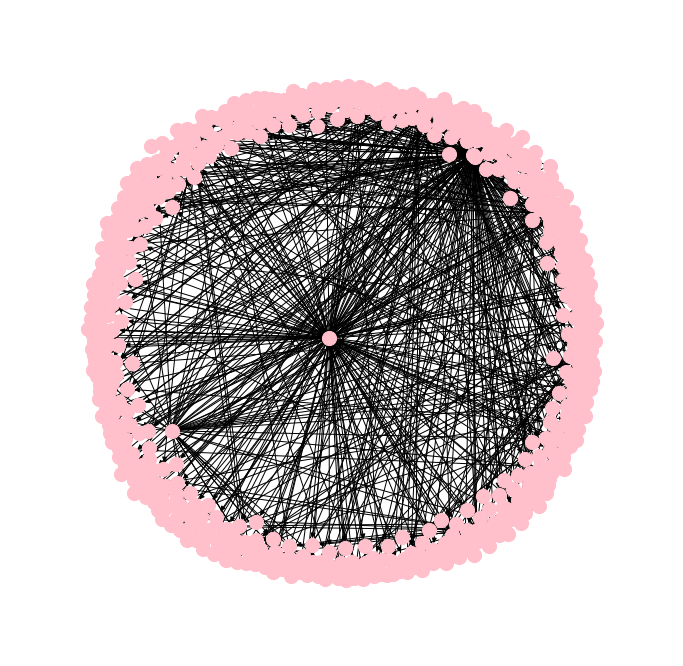

In [19]:
plt.figure(figsize=(12,12))
plt.margins(0.1,0.1)
pos = nx.spring_layout( g, k = 2.2 )
nx.draw(g, pos, with_labels = False, node_size=200, font_size=13, node_color="pink")

# Mention network

In [20]:
entities = []
for l in tweets:
        data = l['entities']
        entities.append(data) 
print("Read %d entities" % len(entities))

Read 13468 entities


In [21]:
entities

[{'hashtags': [{'text': 'TeamUSATennis', 'indices': [93, 107]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1214560721452728320,
    'id_str': '1214560721452728320',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/ENr8iohVAAAAtAa.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/ENr8iohVAAAAtAa.jpg',
    'url': 'https://t.co/igqp7lnE8M',
    'display_url': 'pic.twitter.com/igqp7lnE8M',
    'expanded_url': 'https://twitter.com/usta/status/1214560730550161410/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 2048, 'h': 1366, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 680, 'h': 453, 'resize': 'fit'},
     'medium': {'w': 1200, 'h': 800, 'resize': 'fit'}}}]},
 {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'hcfoo',
    'name': 'hcfoo',
    'id': 18962189,
    'id_str': '18962189',
    'indices': [0, 6]}],
  'urls': [{'url': 'https://t.co/1QoGB2hLXa

In [22]:
df_entities = pd.DataFrame(entities)
df_entities.head(3)

hashtags  \
0  [{'text': 'TeamUSATennis', 'indices': [93, 107]}]   
1                                                 []   
2         [{'text': 'AusOpen', 'indices': [27, 35]}]   

                                               media symbols  \
0  [{'id': 1214560721452728320, 'id_str': '121456...      []   
1                                                NaN      []   
2                                                NaN      []   

                                                urls  \
0                                                 []   
1  [{'url': 'https://t.co/1QoGB2hLXa', 'expanded_...   
2                                                 []   

                                       user_mentions  
0                                                 []  
1  [{'screen_name': 'hcfoo', 'name': 'hcfoo', 'id...  
2                                                 []

In [23]:

g2 = nx.DiGraph()
for i, row in df.iterrows():
    for n in range(len(row['entities']['user_mentions'])):
        for j in row['entities']['user_mentions'][n]:
            g2.add_edge(row['user']['name'], row['entities']['user_mentions'][n]['name'])



In [24]:
g2.number_of_edges(),g2.number_of_nodes()

(3569, 2006)

In [25]:
in_deg = pd.Series(dict( g2.in_degree(weight="weight") ), name="w-in-degree")
pd.DataFrame(in_deg).sort_values(by="w-in-degree", ascending=False).head(10)

w-in-degree
#AusOpen                     25
Rafa Nadal                   19
Roger Federer                18
Novak Djokovic               18
US Open Tennis               18
Serena Williams              17
WTA                          17
Caroline Wozniacki           16
Simona Halep                 16
Wimbledon                    15

/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


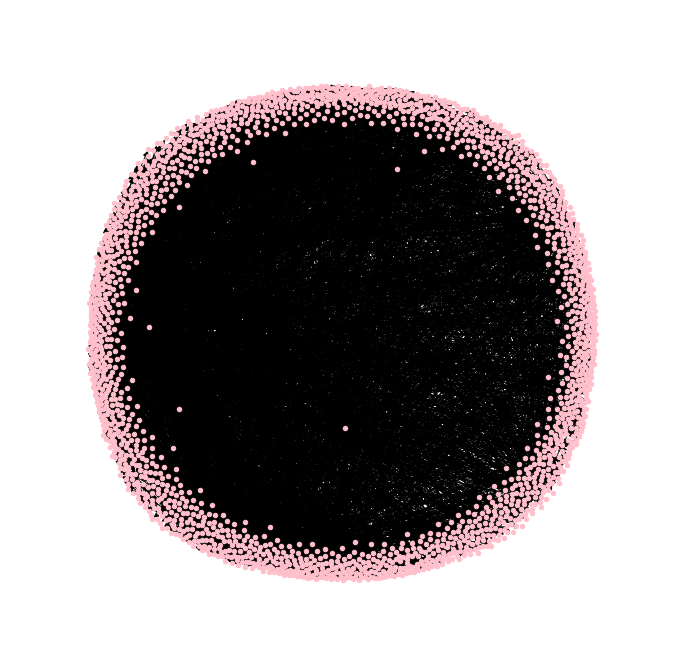

In [26]:
plt.figure(figsize=(12,12))
plt.margins(0.1,0.1)
pos = nx.spring_layout( g2, k = 2.2 )
nx.draw(g2, pos, with_labels = False, node_size=20, font_size=13, node_color="pink")

# User-hashtag network

In [127]:
from networkx.algorithms import bipartite

In [128]:
hashtags = []
for l in entities:
        data = l['hashtags']
        hashtags.append(data) 
print("Read %d hashtags" % len(hashtags))

Read 13468 hashtags


In [129]:
hashtag = []
for i in hashtags:
    for j in i:
        hashtag.append(j)

In [130]:
hashtag_num = []
for l in hashtag:
        data = l['indices']
        hashtag_num.append(data) 
print("Read %d hashtag_num" % len(hashtag_num))


Read 10525 hashtag_num


In [131]:
user_list = []
with open("friendships.csv", "r") as fin:
    for line in fin.readlines():
        user_list.append(line.strip())
print("Read names for %d user_list" % len(user_list))

user_list

Read names for 403 user_list


['atpmediainfo\tandy_murray',
 'atptour\tandy_murray',
 'australianopen\tandy_murray',
 'bbctennis\tandy_murray',
 'bnpparibasopen\tandy_murray',
 'carowozniacki\tandy_murray',
 'andy_murray\tcarowozniacki',
 'daviscup\tandy_murray',
 'fedcup\tandy_murray',
 'mutuamadridopen\tandy_murray',
 'rogerfederer\tandy_murray',
 'serenawilliams\tandy_murray',
 'andy_murray\tserenawilliams',
 'tennis\tandy_murray',
 'tennis_now\tandy_murray',
 'tennischannel\tandy_murray',
 'usopen\tandy_murray',
 'usta\tandy_murray',
 'wimbledon\tandy_murray',
 'wta\tandy_murray',
 'wta_insider\tandy_murray',
 'australianopen\tashbarty',
 'fedcup\tashbarty',
 'tennis\tashbarty',
 'tennis_now\tashbarty',
 'tennischannel\tashbarty',
 'usopen\tashbarty',
 'wimbledon\tashbarty',
 'ashbarty\twimbledon',
 'wta\tashbarty',
 'ashbarty\twta',
 'wta_insider\tashbarty',
 'ashbarty\twta_insider',
 'atptour\tatpmediainfo',
 'atpmediainfo\tatptour',
 'australianopen\tatpmediainfo',
 'atpmediainfo\taustralianopen',
 'atpmedia

In [132]:
user_nodes, hashtags_nodes = set(), set()

In [159]:
b = nx.Graph()
for p in hashtag_num:
    # we don't have the actual names, so create a dummy name
    hash_num = p[0]
    # map to the user name
    user = user_list[p[1]-1] 
    # create the nodes, if necessary
    if not hash_num in hashtags_nodes:
        b.add_node(hash_num, bipartite=1)
        hashtags_nodes.add(user)    
    if not user in user_nodes:
        b.add_node(user, bipartite=0)
        user_nodes.add(user)
    # create the edge 
    user_nodes.add(user)
    b.add_edge( hash_num, user )


In [160]:
print("Created bipartite network with %d nodes and %d edges" % ( b.number_of_nodes(), b.number_of_edges() ) )

Created bipartite network with 568 nodes and 2663 edges


In [161]:
bipartite.is_bipartite(b)

True

In [162]:
degrees = dict( b.degree(hashtags_nodes) )
s_deg = pd.Series( degrees )
df_summary = pd.DataFrame( {"degree" : s_deg} )
df_summary.sort_values( by="degree", ascending=False ).head(10)

degree
bbctennis\trogerfederer             17
atptour\twta                        17
usta\tatpmediainfo                  17
australianopen\tatptour             16
tennis_now\taustralianopen          16
tennischannel\tatptour              16
bnpparibasopen\taustralianopen      16
tennischannel\tatpmediainfo         16
atptour\trogerfederer               16
bbctennis\tatptour                  16

In [163]:
# Identify the number of directors sitting on more than one board
# note: only include the degrees for the director nodes
count = 0
for node, deg in b.degree(hashtags_nodes):
    if deg > 1:
        count += 1
print("%d directors sit on more than one board" % count)

272 directors sit on more than one board


In [164]:
director_deg = dict(  b.degree(hashtags_nodes) )
s_deg = pd.Series( director_deg )
df_summary = pd.DataFrame( {"degree" : s_deg} )
df_summary.sort_values( by="degree", ascending=False ).head(10)

degree
bbctennis\trogerfederer             17
atptour\twta                        17
usta\tatpmediainfo                  17
australianopen\tatptour             16
tennis_now\taustralianopen          16
tennischannel\tatptour              16
bnpparibasopen\taustralianopen      16
tennischannel\tatpmediainfo         16
atptour\trogerfederer               16
bbctennis\tatptour                  16

In [165]:
g3 = bipartite.weighted_projected_graph(b, user_nodes)
print ("Created projected network %d nodes, %d edges" % ( len(g), g.number_of_edges() ))

Created projected network 281 nodes, 3315 edges


/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


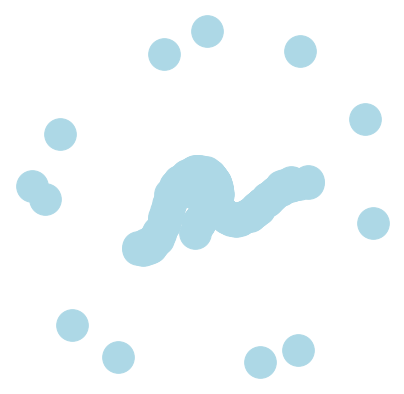

In [166]:
plt.figure(figsize=(7,7))
pos = nx.spring_layout(g3)
nx.draw_networkx(g3, pos, with_labels=False, font_size=13, node_size=1000, node_color="lightblue")
plt.axis("off")
plt.show()

In [168]:
weights = {}
for e in g3.edges(data=True):
    pair = (e[0],e[1])
    weights[pair] = e[2]["weight"]
s_weights = pd.Series( weights ) 
df_weights = pd.DataFrame( {"weight" : s_weights} )
# display the most frequent overlaps (i.e. top weights)
df_weights.sort_values(by="weight",ascending=False).head(10)

weight
39                             40                             15
bnpparibasopen\taustralianopen bbctennis\taustralianopen      15
67                             68                             14
65                             68                             14
50                             51                             14
60                             61                             14
atpmediainfo\twta_insider      australianopen\tatptour        14
38                             39                             14
                               40                             13
50                             53                             13

/Users/guyihan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


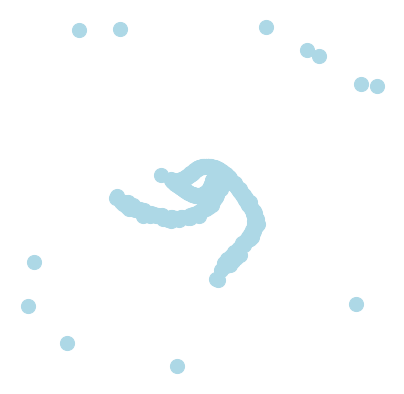

In [169]:
plt.figure(figsize=(7,7))
pos = nx.spring_layout(g3)
nx.draw_networkx(g3, pos, with_labels=False, font_size=13, node_size=200, node_color="lightblue")
plt.axis("off")
plt.show()

# Hashtag Co-occurrence Networks



In [171]:
dfg = nx.to_pandas_edgelist(g3).set_index("id")
dfg.sort_values(by="weight",ascending=False).head(20)

KeyError: 'id'